<a href="https://colab.research.google.com/github/hwl20/Projects/blob/main/Personal_Projects/Private%20Homes%20Price%20Predictor/PrivateHousingGoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import math 

# <br>
# **Retrieving Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Link to Dataset could be found here: https://docs.google.com/spreadsheets/d/1wfzTmOEbRnHw-XDkJZTn2uwBlgqxdUtwsCq6CTCZ-Zs/edit?usp=sharing
df = pd.read_csv("/content/drive/MyDrive/Private Home Data.csv",index_col=0)
df_subset = df.head()
df_subset

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,TURQUOISE,COVE DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2007,Resale,1,3282310,-,2164,Strata,01 to 05,1517,Jul-21
1,AVENUE SOUTH RESIDENCE,SILAT AVENUE,Apartment,3,RCR,99 yrs lease commencing from 2018,New Sale,1,2770000,-,1496,Strata,01 to 05,1851,Jul-21
2,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1466000,-,883,Strata,21 to 25,1661,Jul-21
3,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1701000,-,936,Strata,11 to 15,1816,Jul-21
4,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1086000,-,581,Strata,11 to 15,1868,Jul-21


#<br>
# **Data Preprocessing**

Solving null values

In [ ]:
df.isnull().any(axis=0)

Project Name         False
Street Name          False
Type                 False
Postal District      False
Market Segment       False
Tenure                True
Type of Sale         False
No. of Units         False
Price ($)            False
Nett Price ($)       False
Area (Sqft)          False
Type of Area         False
Floor Level          False
Unit Price ($psf)    False
Date of Sale         False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97140 entries, 0 to 97139
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Project Name       97140 non-null  object
 1   Street Name        97140 non-null  object
 2   Type               97140 non-null  object
 3   Postal District    97140 non-null  int64 
 4   Market Segment     97140 non-null  object
 5   Tenure             97139 non-null  object
 6   Type of Sale       97140 non-null  object
 7   No. of Units       97140 non-null  int64 
 8   Price ($)          97140 non-null  int64 
 9   Nett Price ($)     97140 non-null  object
 10  Area (Sqft)        97140 non-null  int64 
 11  Type of Area       97140 non-null  object
 12  Floor Level        97140 non-null  object
 13  Unit Price ($psf)  97140 non-null  int64 
 14  Date of Sale       97140 non-null  object
dtypes: int64(5), object(10)
memory usage: 11.9+ MB


Tenure has only 1 null value

In [ ]:
missing_row = df[df.isnull().any(axis=1)]
missing_row

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
51834,EMERY POINT,IPOH LANE,Apartment,15,RCR,NaN,Resale,1,725000,-,1302,Strata,01 to 05,557,Jul-17


In [ ]:
similar_development = df[(df['Project Name']=="EMERY POINT") & (df['Street Name']=="IPOH LANE")]
similar_development

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
35419,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1780000,-,1302,Strata,11 to 15,1367,Mar-21
37751,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1738800,-,1324,Strata,16 to 20,1313,Oct-20
38340,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1667000,-,1324,Strata,11 to 15,1259,Sep-20
40727,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1675000,-,1324,Strata,06 to 10,1265,Nov-19
41883,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1800000,-,1324,Strata,16 to 20,1360,Aug-19
42000,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1500000,-,1302,Strata,01 to 05,1152,Aug-19
43261,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1600000,-,1302,Strata,01 to 05,1228,Apr-19
43274,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1550000,-,1302,Strata,06 to 10,1190,Apr-19
49605,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1520000,-,1302,Strata,06 to 10,1167,Dec-17
49631,EMERY POINT,IPOH LANE,Apartment,15,RCR,Freehold,Resale,1,1550000,-,1324,Strata,11 to 15,1171,Dec-17




> Upon Inspection, we shall manually impute the missing cell since similar development are all labelled as 
**'Freehold'**




In [ ]:
df['Tenure'].fillna('Freehold', inplace=True)
df.isnull().any()

Project Name         False
Street Name          False
Type                 False
Postal District      False
Market Segment       False
Tenure               False
Type of Sale         False
No. of Units         False
Price ($)            False
Nett Price ($)       False
Area (Sqft)          False
Type of Area         False
Floor Level          False
Unit Price ($psf)    False
Date of Sale         False
dtype: bool

Checking for duplicates

In [ ]:
dup = df[df.duplicated()]
dup

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
75,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1104000,-,581,Strata,21 to 25,1899,Jul-21
81,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1350000,-,732,Strata,01 to 05,1844,Jul-21
82,NORMANTON PARK,NORMANTON PARK,Apartment,5,RCR,99 yrs lease commencing from 2019,New Sale,1,1350000,-,732,Strata,01 to 05,1844,Jul-21
162,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 yrs lease commencing from 2019,New Sale,1,1850000,-,700,Strata,31 to 35,2644,Jul-21
204,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 yrs lease commencing from 2019,New Sale,1,1850000,-,840,Strata,21 to 25,2203,Jul-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97028,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2014,New Sale,1,1004000,-,1023,Strata,01 to 05,982,Sep-16
97032,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2014,New Sale,1,769000,-,689,Strata,11 to 15,1116,Sep-16
97082,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2014,New Sale,1,743000,-,689,Strata,11 to 15,1079,Aug-16
97107,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2014,New Sale,1,808000,-,797,Strata,01 to 05,1014,Aug-16




> Over 3% of data are duplciates - Exact same Pricing and other features



> We shouldn't be too alarmed as housing of the same development and build are usually sold about the same price (or in this case exactly the same price, which is especially true for New Sale Homes)






---
# <br>
Labelling the data into a suitable format





In [ ]:
df.dtypes

Project Name         object
Street Name          object
Type                 object
Postal District       int64
Market Segment       object
Tenure               object
Type of Sale         object
No. of Units          int64
Price ($)             int64
Nett Price ($)       object
Area (Sqft)           int64
Type of Area         object
Floor Level          object
Unit Price ($psf)     int64
Date of Sale         object
dtype: object

In [ ]:
df.apply(lambda x: x.unique().size, axis=0)

Project Name          2279
Street Name            832
Type                     2
Postal District         27
Market Segment           3
Tenure                 124
Type of Sale             2
No. of Units            62
Price ($)            17295
Nett Price ($)         494
Area (Sqft)            640
Type of Area             2
Floor Level             17
Unit Price ($psf)     3243
Date of Sale            61
dtype: int64

In [ ]:
types_of_tenures = df.Tenure.unique()
print("We have exactly", types_of_tenures.shape[0], "variation of tenures")
print(types_of_tenures)

We have exactly 124 variation of tenures
['99 yrs lease commencing from 2007' '99 yrs lease commencing from 2018'
 '99 yrs lease commencing from 2019' '99 yrs lease commencing from 2020'
 '99 yrs lease commencing from 1973' '99 yrs lease commencing from 2021'
 '99 yrs lease commencing from 2011' '99 yrs lease commencing from 2009'
 '99 yrs lease commencing from 1999' 'Freehold'
 '99 yrs lease commencing from 2012' '99 yrs lease commencing from 2006'
 '99 yrs lease commencing from 1980' '99 yrs lease commencing from 2005'
 '99 yrs lease commencing from 2008' '956 yrs lease commencing from 1928'
 '99 yrs lease commencing from 2002' '99 yrs lease commencing from 2015'
 '99 yrs lease commencing from 2003' '99 yrs lease commencing from 2013'
 '99 yrs lease commencing from 1995' '99 yrs lease commencing from 2004'
 '99 yrs lease commencing from 2014' '99 yrs lease commencing from 1993'
 '99 yrs lease commencing from 1998' '99 yrs lease commencing from 2017'
 '99 yrs lease commencing from 199

In [ ]:
tenure_information = df.Tenure.value_counts()
tenure_information

Freehold                                 27350
99 yrs lease commencing from 2018        13332
99 yrs lease commencing from 2017         5246
99 yrs lease commencing from 2019         5117
99 yrs lease commencing from 2016         4821
                                         ...  
999 yrs lease commencing from 1835           1
9999 yrs lease commencing from 1962          1
99 years leasehold                           1
999 yrs lease commencing from 1958           1
999999 yrs lease commencing from 1963        1
Name: Tenure, Length: 124, dtype: int64



> Common format: x yrs lease commencing from y



---
#<br>
Dealing with formatting for exceptions



---

*Tenure*

In [ ]:
df[df.Tenure=='99 years leasehold']

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
62914,PARKWOOD RESIDENCES,YIO CHU KANG ROAD,Apartment,19,OCR,99 years leasehold,New Sale,1,1736800,-,1313,Strata,01 to 05,1323,Jun-20


In [ ]:
similar_development = df[(df['Project Name']=="PARKWOOD RESIDENCES") & (df['Street Name']=="YIO CHU KANG ROAD")]
similar_development

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
62914,PARKWOOD RESIDENCES,YIO CHU KANG ROAD,Apartment,19,OCR,99 years leasehold,New Sale,1,1736800,-,1313,Strata,01 to 05,1323,Jun-20




> No similar development in the dataset

> Upon research, PARKWOOD RESIDENCES has a 99 yrs lease commencing from 2018 

> - https://www.mysgprop.com/parkwood-residences-oxley/





In [ ]:
df['Tenure'].replace('99 years leasehold','99 yrs lease commencing from 2018', inplace=True)
df['Tenure'].replace('110 Yrs From 01/11/2017','110 yrs lease commencing from 2017', inplace=True)

Now, dealing with the freehold homes we decide to create a new feature called **isFreehold** with the following categories:

> Freehold

> Not Freehold

In [ ]:
df['isFreehold'] = df.apply(lambda x: 'Freehold' if x.Tenure =='Freehold' else 'Not Freehold', axis=1)

Next we will apply a function to get the remaining lease of all houses 

In [ ]:
df['Tenure'].replace('Freehold','999999 yrs commencing from 2021', inplace=True)


def remaining_lease(row):
    '''
    Function is used to extract remaining lease term of the development using information from tenure column
    '''
    lst = row['Tenure'].split(' ')
    remain = (int(lst[0])-(date.today().year - int(lst[-1])))
    return remain

    
df['remaining lease'] = df.apply(remaining_lease, axis=1)



---
Floor Level



In [ ]:
type_of_floor = df['Floor Level'].unique()
type_of_floor

array(['01 to 05', '21 to 25', '11 to 15', '06 to 10', '16 to 20',
       '36 to 40', '31 to 35', '26 to 30', '41 to 45', '51 to 55',
       '46 to 50', '56 to 60', '61 to 65', '-', '66 to 70', 'B1 to B5',
       '71 to 75'], dtype=object)

In [ ]:
df['Floor Level'].value_counts()

01 to 05    35476
06 to 10    24479
11 to 15    17257
16 to 20     8976
21 to 25     4414
26 to 30     2758
31 to 35     1951
36 to 40      986
41 to 45      355
-             165
46 to 50      151
51 to 55       66
56 to 60       38
61 to 65       29
66 to 70       20
B1 to B5       15
71 to 75        4
Name: Floor Level, dtype: int64

In [ ]:
df[df['Floor Level']=='-']

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,isFreehold,remaining lease
3652,SARHAD VILLE,LORONG SARHAD,Condominium,5,RCR,999999 yrs commencing from 2021,Resale,1,1220000,-,1238,Strata,-,986,Dec-20,Freehold,999999
11381,SARHAD VILLE,LORONG SARHAD,Condominium,5,RCR,999999 yrs commencing from 2021,Resale,1,1300000,-,1206,Strata,-,1078,Aug-18,Freehold,999999
15980,LOTUS AT PASIR PANJANG,PASIR PANJANG ROAD,Condominium,5,RCR,999999 yrs commencing from 2021,Resale,106,121000000,-,89622,Land,-,1350,Jul-17,Freehold,999999
19798,CASABELLA,DUCHESS AVENUE,Condominium,10,CCR,999999 yrs commencing from 2021,Resale,1,4200000,-,3800,Strata,-,1105,Jul-21,Freehold,999999
20347,PATERSON RESIDENCE,PATERSON ROAD,Condominium,9,CCR,999999 yrs commencing from 2021,Resale,1,7100000,-,3843,Strata,-,1848,May-21,Freehold,999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95627,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,2796875,-,4672,Strata,-,599,Jan-18,Not Freehold,90
95628,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,2796875,-,4672,Strata,-,599,Jan-18,Not Freehold,90
95631,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,2796875,-,4672,Strata,-,599,Jan-18,Not Freehold,90
95632,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,2796875,-,4672,Strata,-,599,Jan-18,Not Freehold,90




> Research shows that developments with Floor Level = '-' are generally 01 to 05 stories tall


> Here are 2 examples of such developments:


1.   SERENE VIEW MANSIONS
2.   SKIES MILTONIA







In [ ]:
# SERENE VIEW MANSIONS
similar_development = df[(df['Project Name']=="SERENE VIEW MANSIONS") & (df['Street Name']=="LORONG SELANGAT")]
similar_development

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,isFreehold,remaining lease
39731,SERENE VIEW MANSIONS,LORONG SELANGAT,Condominium,13,OCR,999999 yrs commencing from 2021,Resale,1,968000,-,1130,Strata,-,856,Apr-20,Freehold,999999
52781,SERENE VIEW MANSIONS,LORONG SELANGAT,Condominium,13,OCR,999999 yrs commencing from 2021,Resale,1,1600000,-,2239,Strata,-,715,Apr-17,Freehold,999999
54131,SERENE VIEW MANSIONS,LORONG SELANGAT,Condominium,13,OCR,999999 yrs commencing from 2021,Resale,1,1600000,-,2239,Strata,-,715,Mar-17,Freehold,999999


In [ ]:
# SKIES MILTONIA
similar_development = df[(df['Project Name']=="SKIES MILTONIA") & (df['Street Name']=='MILTONIA CLOSE')]
similar_development

,Project Name,Street Name,Type,Postal District,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,isFreehold,remaining lease
93507,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,1030000,-,1076,Strata,01 to 05,957,Jul-21,Not Freehold,90
93529,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,900000,-,743,Strata,11 to 15,1212,Jun-21,Not Freehold,90
93534,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,1180000,-,1184,Strata,06 to 10,997,Jun-21,Not Freehold,90
93536,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,623000,-,527,Strata,06 to 10,1181,Jun-21,Not Freehold,90
93560,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,812000,-,743,Strata,06 to 10,1093,Jun-21,Not Freehold,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96799,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,785000,-,721,Strata,01 to 05,1088,Dec-16,Not Freehold,90
96867,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,1268000,-,1076,Strata,11 to 15,1178,Nov-16,Not Freehold,90
96890,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,550000,-,484,Strata,01 to 05,1135,Nov-16,Not Freehold,90
96900,SKIES MILTONIA,MILTONIA CLOSE,Condominium,27,OCR,99 yrs lease commencing from 2012,Resale,1,595000,-,484,Strata,01 to 05,1228,Oct-16,Not Freehold,90


Hence we classify housing with "Floor Level" == '-' to be within the '01 to 05' floor range


In [ ]:
df['Floor Level'].replace('-','01 to 05', inplace=True)

<br>
<br>
<br>


---




Simple Feature Engineering to remove some less important features


Checking number of unique values in each column

In [ ]:
# Keeping a spare dataframe copy for later use
df_original = df.copy()

In [ ]:
cols_to_remove = []

1. Project Name and Street Name are too specific for our analysis hence we will remove them 


>  Business POV



In [ ]:
cols_to_remove.extend(['Project Name','Street Name'])  

Remove Tenure since we have already created 'remaining lease' variable


> Data POV




In [ ]:
cols_to_remove.append('Tenure')

In [ ]:
print(round(int((df['Nett Price ($)']=='-').sum())/df.shape[0],2)*100,"%  of data have 'Nett Price($)' == '-' ",sep="")

99.0%  of data have 'Nett Price($)' == '-' 


Therefore, we will ignore the "Nett Price(\$)" variable, and instead stick with just "Price ($)" as our outcome variable

> Data POV




In [ ]:
cols_to_remove.append('Nett Price ($)')  

"Unit Price ($psf)" will immediately give away the housing price and is also too specific of a parameter for user to input

* This is because "Price (\$)" = "Area (Sqft)" x "Unit Price ($psf)"



> Data POV + Business POV




In [ ]:
cols_to_remove.append('Unit Price ($psf)')

We are considering the most recent 5 years of housing sales, to keep prices relevant, and since we are not doing a time series analysis, we will omit 'Date of Sale' as well


> Business POV



In [ ]:
cols_to_remove.append('Date of Sale')   

In [ ]:
cols_to_remove

['Project Name',
 'Street Name',
 'Tenure',
 'Nett Price ($)',
 'Unit Price ($psf)',
 'Date of Sale']

Removing the mentioned columns

In [ ]:
df.drop(cols_to_remove, axis=1, inplace=True)

<br>
<br>
<br>
<br>

#**Data Visualization**

Exploring the categorical variables 

In [ ]:
print(df.columns)
lst_of_categorical_variables = ['Type','Postal District','Market Segment','Type of Sale','No. of Units', 'Type of Area','Floor Level', 'isFreehold']
print("\n\n - We have ", len(lst_of_categorical_variables), " categorical variables", sep='')

print(lst_of_categorical_variables)

Index(['Type', 'Postal District', 'Market Segment', 'Type of Sale',
       'No. of Units', 'Price ($)', 'Area (Sqft)', 'Type of Area',
       'Floor Level', 'isFreehold', 'remaining lease'],
      dtype='object')


 - We have 8 categorical variables
['Type', 'Postal District', 'Market Segment', 'Type of Sale', 'No. of Units', 'Type of Area', 'Floor Level', 'isFreehold']




---

Viewing the distribution of the categorical predictors

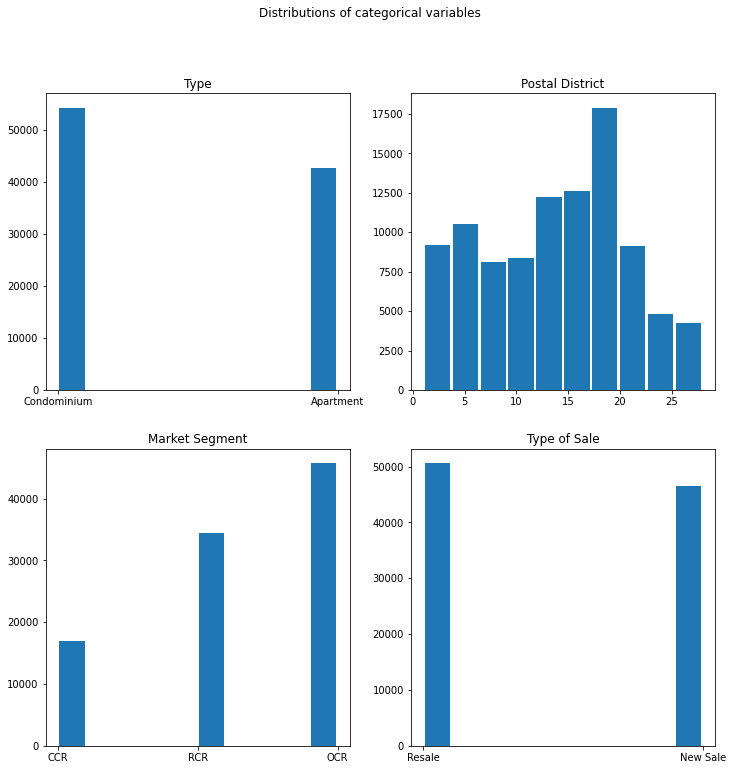

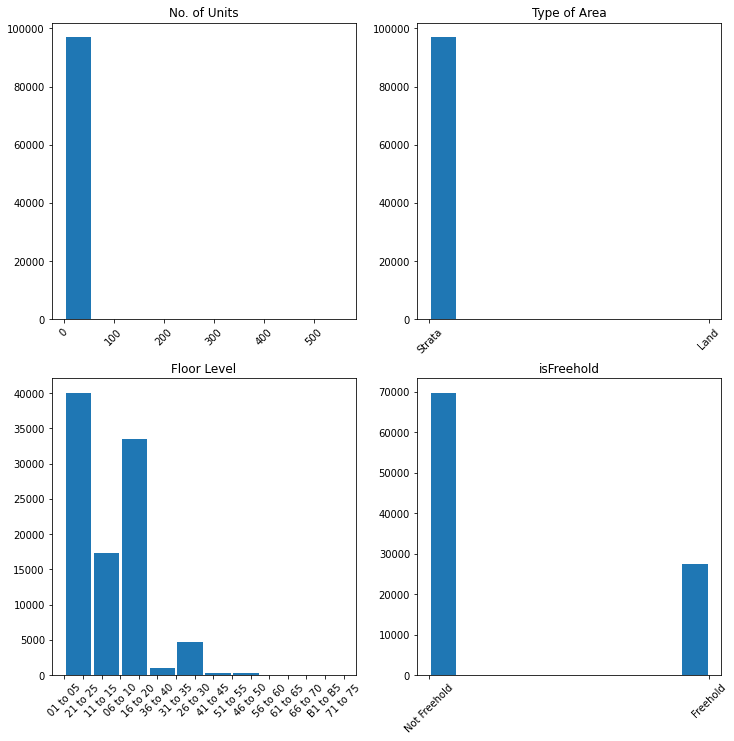

In [ ]:
plt.figure(figsize=(12,12))
plt.suptitle("Distributions of categorical variables")
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(lst_of_categorical_variables[i])
    plt.hist(df[lst_of_categorical_variables[i]], rwidth=0.9)

plt.figure(figsize=(12,12))
for i in range(4,8):
    plt.subplot(2,2,i-3)
    plt.title(lst_of_categorical_variables[i])
    plt.hist(df[lst_of_categorical_variables[i]], rwidth=0.9)
    plt.xticks(rotation=45)
# We split the plotting into 2 sections due to limitations of plotsize allowed when coding on IDE

Basic analysis on distribution of categorical variables:
    <br><br>
* More condominum than apartment type housing
    <br>
* Fairly balanced number of sales in each Postal District
    <br>
* Most sales occured Outside Central Region (OCR), followed by Rest of Central Region(RCR) and lastly Core Centreal Region(CCR)
    <br>
* Both Resale and New Sales of condominiums & apartments are almost the same price
    <br>
* Most transaction involve low number of units, understandably so as people usually only buy 1 property at each go
    <br>
* Most transaction are of Strata format, because we extracted only condominum and apartment data from website, land may be because a developer bought out entire space for rebuild (a possible for Land)
    <br>
* Most homes transacted are under 30 stories as homes in Singapore are usually around that range, rarity are those around 40-50 stories
    <br>
* Less Freehold homes are transacted as compared to non-freehold ones


<br><br>
Viewing the distribution of the continuous predictors

---





In [ ]:
lst_of_continuous_variables = list(set(df.columns)-set(lst_of_categorical_variables))
print(" - We have ", len(lst_of_continuous_variables), " continuous variables", sep='')
print(lst_of_continuous_variables)

 - We have 3 continuous variables
['Price ($)', 'remaining lease', 'Area (Sqft)']


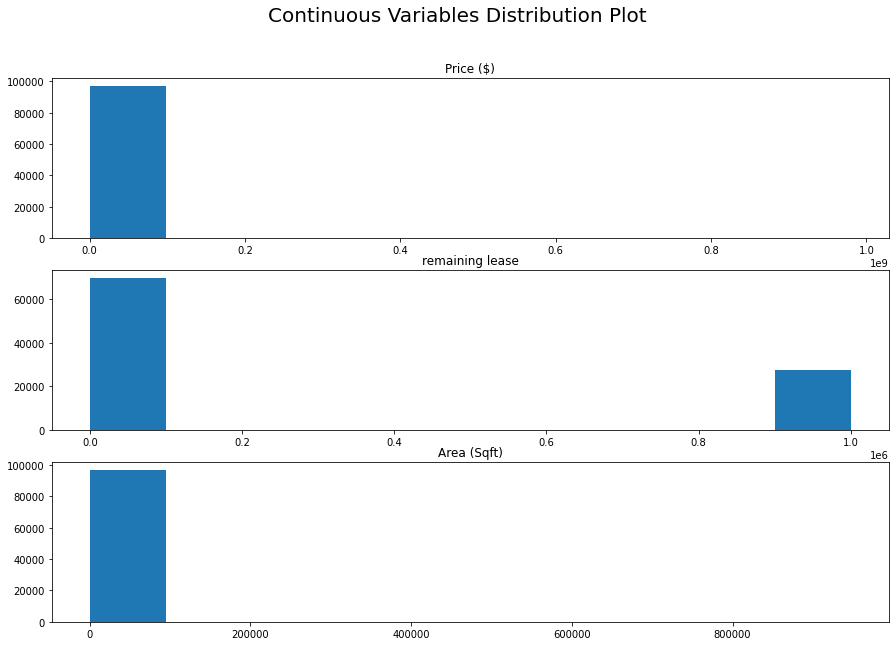

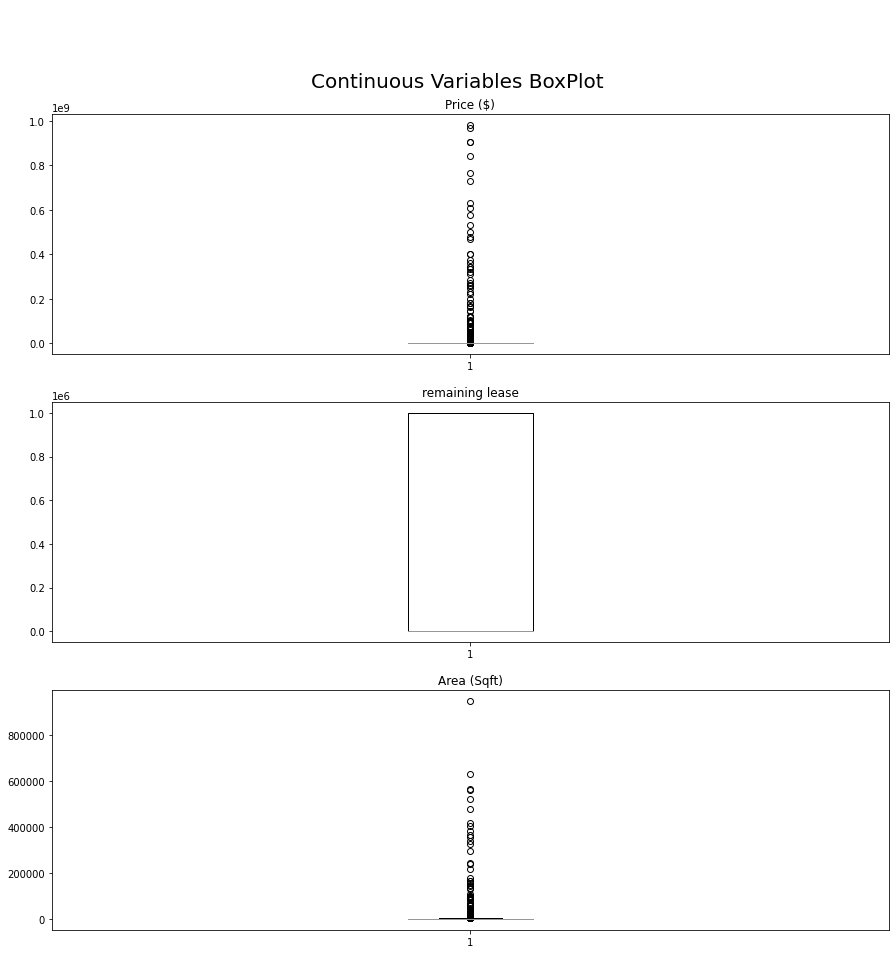

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Continuous Variables Distribution Plot", fontsize=20)
for i  in range(len(lst_of_continuous_variables)):
    plt.subplot(3,1,i+1)
    plt.title(lst_of_continuous_variables[i])
    plt.hist(df[lst_of_continuous_variables[i]])


plt.figure(figsize=(15,15))
plt.suptitle("\n\n\nContinuous Variables BoxPlot",  fontsize=20)
for i  in range(len(lst_of_continuous_variables)):
    plt.subplot(3,1,i+1)
    plt.title(lst_of_continuous_variables[i])
    plt.boxplot(df[lst_of_continuous_variables[i]])

> Distribution does not show any insights due to heavy outliers


> We shall do some simple clean up of datapoints




In [ ]:
df_continuous = df[lst_of_continuous_variables]
df_continuous.describe()
df_continuous = df_continuous[df_continuous['Area (Sqft)']<10000]
df_continuous = df_continuous[df_continuous['Price ($)']<10**7]
df_continuous['remaining lease'].where(df_continuous['remaining lease'] < 999, 999, inplace=True)
(df_continuous['remaining lease'].value_counts()).sort_index() # We changed approximately 27007 houses from >999 years/freehold status to 999 years


30         2
46        58
47        10
48        60
50         1
       ...  
968        1
969        1
973       31
997        1
999    27007
Name: remaining lease, Length: 83, dtype: int64

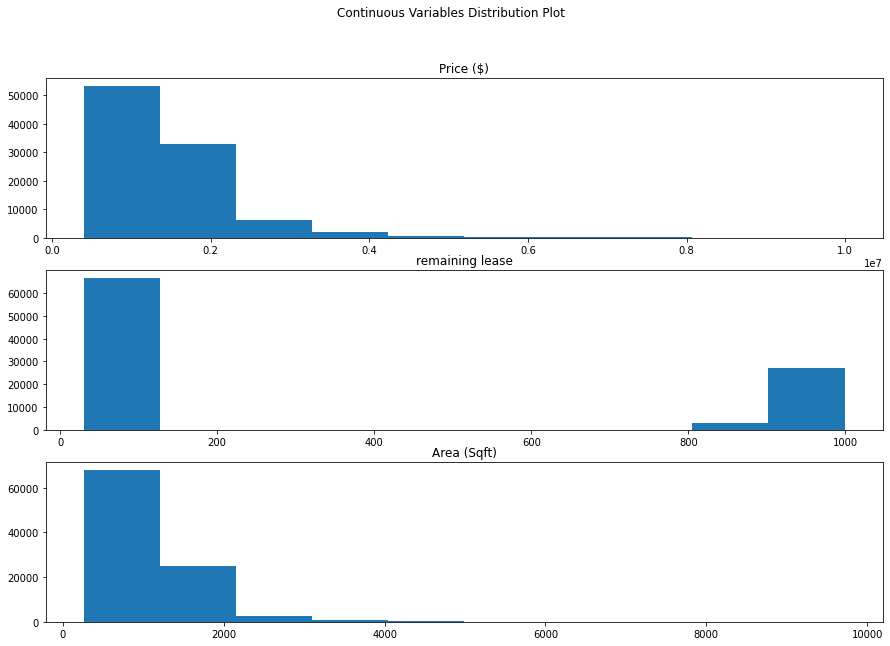

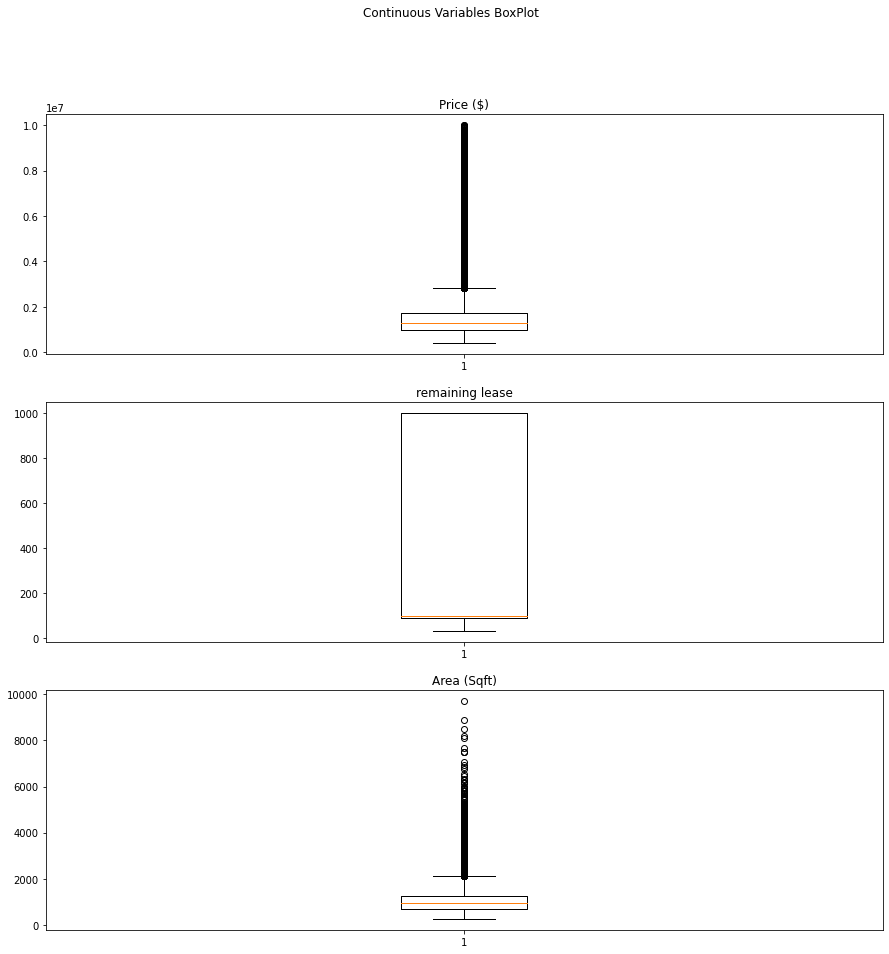

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Continuous Variables Distribution Plot")
for i  in range(len(lst_of_continuous_variables)):
    plt.subplot(3,1,i+1)
    plt.title(lst_of_continuous_variables[i])
    plt.hist(df_continuous[lst_of_continuous_variables[i]])

plt.figure(figsize=(15,15))
plt.suptitle("Continuous Variables BoxPlot")
for i  in range(len(lst_of_continuous_variables)):
    plt.subplot(3,1,i+1)
    plt.title(lst_of_continuous_variables[i])
    plt.boxplot(df_continuous[lst_of_continuous_variables[i]])

After some simple cleaning of outlier values:
<br>
 - Both 'Area (Sqft)' and 'Price ($)' follow a log normal distibution after cleaning up some datapoints,
but 'remaining lease' still look to have 2 ends of the spectrum 
 - This is due to having homes which are of 9999/999999/freehold status
 - We might have to adjust this 'remaining lease' variable more should we choose to use this variable later in the model


<br>


---






Plotting categorical variables against Price ($)

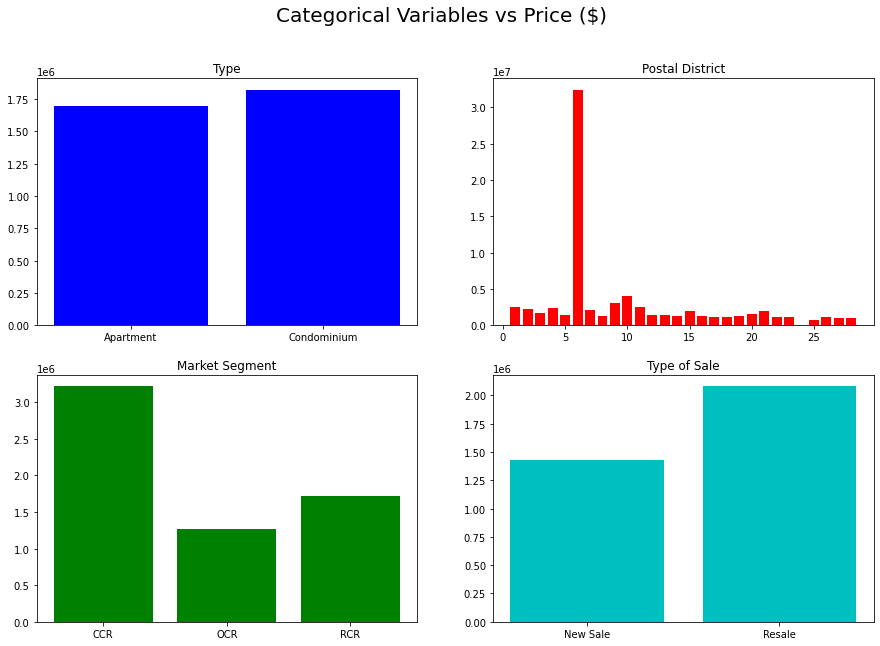

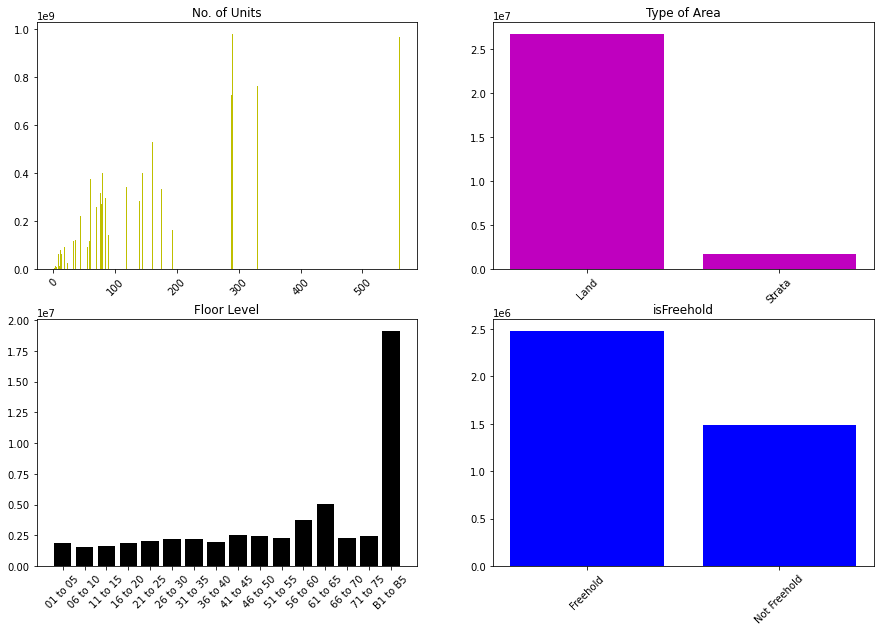

In [ ]:
color_palette = ['b','r','g','c','y','m','k','b']
plt.figure(figsize=(15,10))
plt.suptitle("Categorical Variables vs Price ($)", fontsize=20)
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title(lst_of_categorical_variables[i])
    cat_unique = df.groupby(lst_of_categorical_variables[i]).mean()['Price ($)'].index
    cat_average = df.groupby(lst_of_categorical_variables[i]).mean()['Price ($)']
    plt.bar(x = cat_unique, height = cat_average, 
            color = color_palette[i])
    
plt.figure(figsize=(15,10))
for i in range(4,8):
    plt.subplot(2,2,i-3)
    plt.title(lst_of_categorical_variables[i])
    cat_unique = df.groupby(lst_of_categorical_variables[i]).mean()['Price ($)'].index
    cat_average = df.groupby(lst_of_categorical_variables[i]).mean()['Price ($)']
    plt.bar(x = cat_unique, height = cat_average, 
            color = color_palette[i])
    plt.xticks(rotation=45)

Quick Analysis:
- Condominium and Apartment have similar pricing
- Postal District 6 (Town area) seems to have abnormally high Price ($) **
- Core Central Region has the highest average housing pricing, as expected
- Resale homes are more expensive than New Homes
- Higher No. of units per transaction means higher price
- Land labelled homes are generally more expensive than Strata ones
- Higher floor points to higer pricing
- Freehold houses are more expensive than non freehold houses

** represent insights that are not expected

<br>

---

Plotting continuous variables against Price ($)



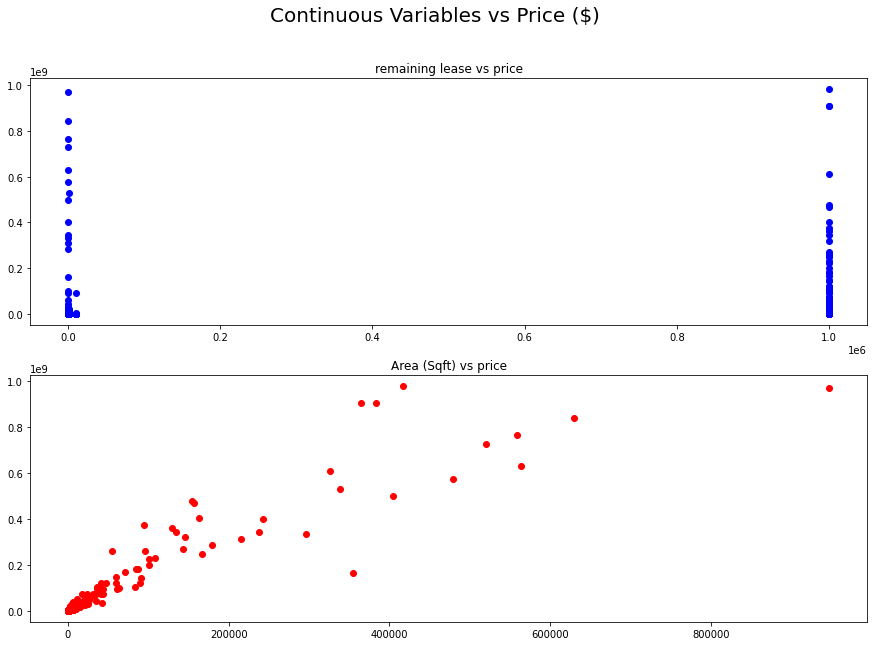

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Continuous Variables vs Price ($)", fontsize=20)
continuous_predictors = list(set(lst_of_continuous_variables) - set(['Price ($)']))
for i  in range(len(continuous_predictors)):
    plt.subplot(2,1,i+1)
    plt.title(continuous_predictors[i]+ " vs price")
    plt.scatter(df[continuous_predictors[i]], df['Price ($)'], 
                c = color_palette[i])

Observations:
* As Area (Sqft) increases, Price increases as well
* Again, due to remaining lease having 9999/99999/freehold years status, we get a weird scatterplot

After doing some simple clean up of datapoints

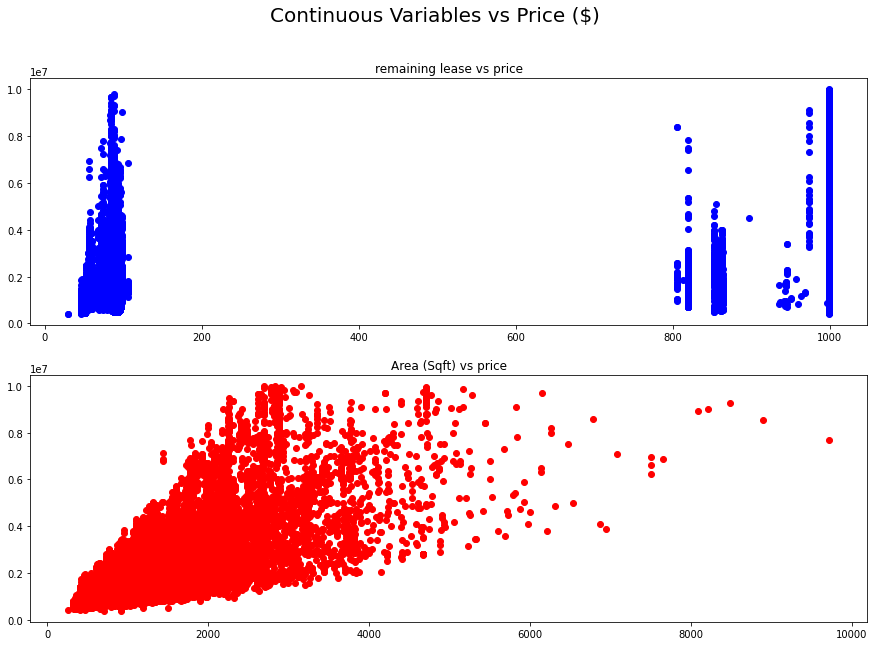

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle("Continuous Variables vs Price ($)", fontsize=20)
continuous_predictors = list(set(lst_of_continuous_variables) - set(['Price ($)']))
for i  in range(len(continuous_predictors)):
    plt.subplot(2,1,i+1)
    plt.title(continuous_predictors[i]+ " vs price")
    plt.scatter(df_continuous[continuous_predictors[i]], df_continuous['Price ($)'], 
                c = color_palette[i])

Even scaling down the remaining lease does not seem to aid the plot as the range we set for 9999/99999/freehold houses are still quite large.

Here, we might consider to 

1) scale it down futher (without hurting the integrity of freehold housing)

2) stick to the categorical variable 'isFreehold' to differentiate the 2 categories

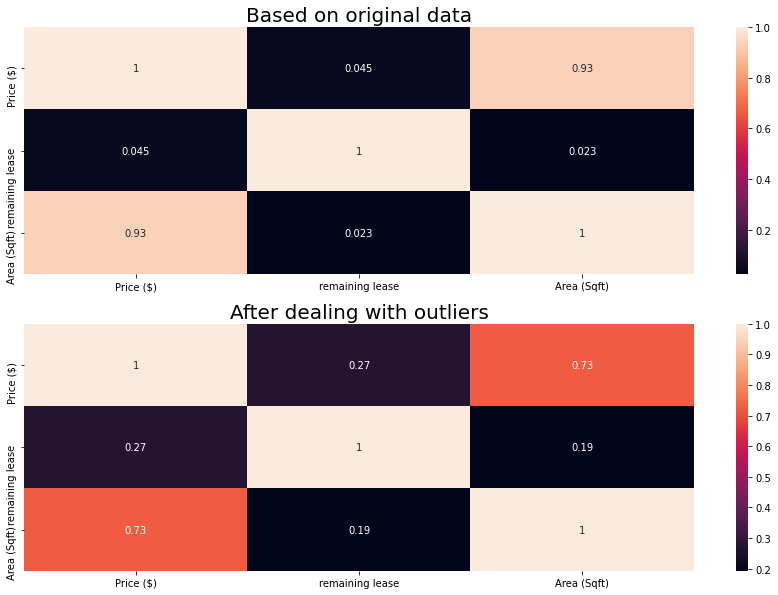

In [ ]:
corr_table = df[lst_of_continuous_variables].corr()
corr_table_after_outliers = df_continuous[lst_of_continuous_variables].corr()
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("Based on original data", fontsize=20)
sns.heatmap(corr_table, annot=True)
plt.subplot(212)
plt.title("\n\nAfter dealing with outliers", fontsize=20)
sns.heatmap(corr_table_after_outliers, annot=True)



> Adjusting 'remaining lease' did help boost the correlation between remaining lease and Price ($), but correlation still weak

> No sign of multicollinearity that seem to have to be dealt with though





<br>

#**Feature Engineering**

In [ ]:
def return_unique(input_col):
    '''
    function to get unique datapoints in each column
    '''
    return input_col.unique()

print("Unique values for each column: \n\n")    
for i in range(len(df.columns)):
    if df.columns[i]=="Price ($)":
        continue
    print(df.columns[i],":", list(return_unique(df.iloc[:,i])),'\n')

Unique values for each column: 


Type : ['Condominium', 'Apartment'] 

Postal District : [4, 3, 5, 2, 1, 9, 10, 7, 8, 6, 15, 11, 13, 14, 12, 19, 18, 17, 16, 20, 23, 26, 21, 25, 22, 28, 27] 

Market Segment : ['CCR', 'RCR', 'OCR'] 

Type of Sale : ['Resale', 'New Sale'] 

No. of Units : [1, 2, 5, 70, 139, 84, 288, 436, 4, 106, 3, 18, 9, 15, 7, 12, 193, 58, 55, 22, 60, 67, 164, 44, 19, 32, 290, 20, 48, 61, 33, 79, 8, 104, 17, 28, 13, 11, 10, 6, 14, 30, 38, 76, 89, 144, 114, 43, 118, 200, 36, 23, 330, 175, 336, 78, 560, 244, 286, 210, 160, 124] 

Area (Sqft) : [2164, 1496, 883, 936, 581, 527, 1442, 1249, 1109, 1130, 753, 1292, 495, 861, 1582, 893, 721, 958, 947, 850, 764, 678, 689, 1647, 463, 969, 1066, 1475, 1184, 1001, 657, 1238, 1507, 818, 980, 786, 829, 1033, 377, 1711, 560, 990, 1141, 1119, 570, 1421, 1087, 743, 732, 2002, 915, 667, 1636, 517, 2788, 1098, 1378, 926, 603, 538, 1152, 2110, 592, 1076, 775, 1690, 807, 710, 1302, 1367, 1023, 1485, 1173, 1012, 1733, 624, 1216, 1356, 700, 

We are only interested in single home transaction

In [ ]:
df = df[df['No. of Units']==1]                      
df.drop(['No. of Units'], axis=1, inplace = True)   # Since only 1 category left

We are only interested in non-landed categories

In [ ]:
df['Type of Area'].value_counts()

Strata    97013
Land          6
Name: Type of Area, dtype: int64

In [ ]:
df = df[df['Type of Area']=='Strata']    
df.drop(['Type of Area'], axis=1, inplace = True)  

> Next we will adjust data according to ensure a good fit for our model later

> Choosing a suitable value to include for remaining lease





In [ ]:
df['remaining lease'].quantile([0.5,0.65,0.6875,0.7,0.95])

0.5000        96.0
0.6500        97.0
0.6875       805.0
0.7000       860.0
0.9500    999999.0
Name: remaining lease, dtype: float64

In [ ]:
print("remaining lease unique years:\n")
df["remaining lease"].value_counts().sort_index().index

remaining lease unique years:



Int64Index([    30,     46,     47,     48,     50,     51,     52,     53,
                54,     55,     56,     57,     58,     59,     60,     61,
                62,     65,     67,     68,     69,     70,     71,     72,
                73,     74,     75,     76,     77,     78,     79,     80,
                81,     82,     83,     84,     85,     86,     87,     88,
                89,     90,     91,     92,     93,     94,     95,     96,
                97,     98,     99,    106,    805,    813,    819,    852,
               853,    854,    855,    856,    857,    860,    861,    862,
               863,    864,    897,    935,    936,    942,    943,    944,
               945,    946,    950,    957,    960,    963,    968,    969,
               973,    997,   9935,   9938,   9939,   9941,   9942,   9969,
              9971,   9973,   9982, 999936, 999941, 999971, 999999],
           dtype='int64')

> There is a huge jump from 106 year to 805 years. We can choose >=805 to be scaled down then

> Lets change all those that are >=805 years to be approximately 300 years to create some kind of linear correlation






In [ ]:
df_continuous = df.copy()
df_continuous = df_continuous[['Price ($)', 'Area (Sqft)', 'remaining lease']]
df_continuous['remaining lease'].where(df_continuous['remaining lease'] <=800 , 300, inplace=True)

In [ ]:
df_continuous.corr()

,Price ($),Area (Sqft),remaining lease
Price ($),1.000000,0.745094,0.245171
Area (Sqft),0.745094,1.000000,0.185628
remaining lease,0.245171,0.185628,1.000000


In [ ]:
df[['Price ($)', 'Area (Sqft)', 'remaining lease']].corr()

,Price ($),Area (Sqft),remaining lease
Price ($),1.000000,0.745094,0.250260
Area (Sqft),0.745094,1.000000,0.190821
remaining lease,0.250260,0.190821,1.000000


> correlation of remaining lease does not seem to improve despite reducing the range of values, hence we will just continue to use what we have first and if necessary, remove this variable later


---

Lets see if we have succesfully dealt with the abnormally high prices we seen in the earlier plot for 'Postal District' VS 'Price($)'


<BarContainer object of 27 artists>

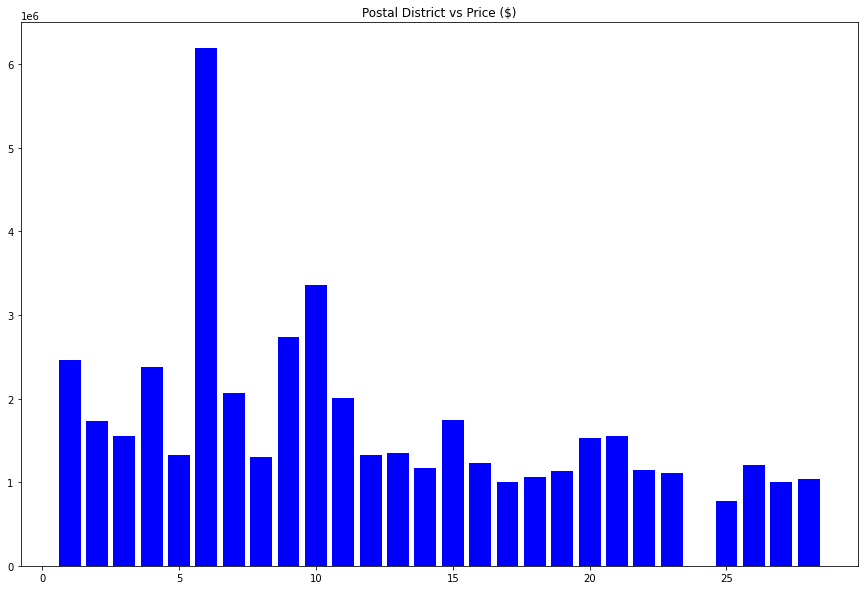

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Postal District vs Price ($)')
cat_unique = df['Postal District'].unique()
cat_unique.sort()
cat_average = df.groupby('Postal District').mean()['Price ($)']
plt.bar(x = cat_unique, height = cat_average, color = 'b')

> Yes we have - District 6 value is now more normal (arnd $6 million)

---

One Hot Encoding Categorical Variables

In [ ]:
lst_of_categorical_variables.remove('No. of Units')
lst_of_categorical_variables.remove('Type of Area')
df[lst_of_categorical_variables] = df[lst_of_categorical_variables].astype('category')
df = pd.get_dummies(df,drop_first=True)

Log normalizing the 'Price ($)' outcome variable 

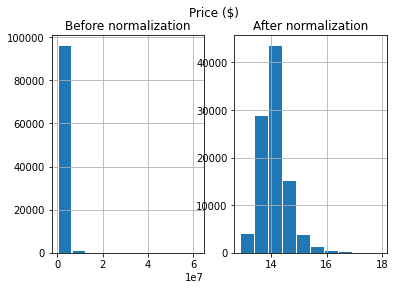

In [ ]:
df1 = df['Price ($)']
df2 = np.log(df1)
plt.figure()
plt.suptitle("Price ($)")
plt.subplot(1,2,1)
plt.title("Before normalization")
df1.hist(rwidth=0.9)
plt.subplot(1,2,2)
plt.title("After normalization")
df2.hist(rwidth=0.9)
df['Price ($)'] = np.log(df['Price ($)'])

Outcome variable now looks normalized

<br>

# **Building Preliminary model**

In [ ]:
model_scores_df = pd.DataFrame(columns=['K-fold Average','r2_test','adjusted r2_test'],
                               index = ['model1','model2','model3','model4','model5'])

**Model 1**

In [ ]:
# Model 1 - Retaining ALL remaining variables and their ranges (except 'remaining lease' whereby we changed 9999/99999/999999/freehold housings to 999 years)
from sklearn.model_selection import train_test_split
X = df.drop(['Price ($)'], axis=1)
Y = df[['Price ($)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))
model_scores_df.loc['model1'] = [round(scores.mean(),3),round(r2_test,3),round(adjusted_r2_test,3)]


Cross validated R^2 scores:  [0.80622401 0.8115472  0.80188012 0.77114396 0.80434376 0.80556757]
K fold Cross Validation Average Score: 0.8
r2 test:  0.801 
adjusted r2 test 0.8


**Model 2**

In [ ]:
# Model 2 - Removing 'remaining lease' variable
from sklearn.model_selection import train_test_split
X = df.drop(['Price ($)','remaining lease'], axis=1)
Y = df[['Price ($)']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))
model_scores_df.loc['model2'] = [round(scores.mean(),3),round(r2_test,3),round(adjusted_r2_test,3)]


Cross validated R^2 scores:  [0.80638192 0.81168138 0.80188259 0.77114707 0.80434597 0.80557221]
K fold Cross Validation Average Score: 0.8
r2 test:  0.801 
adjusted r2 test 0.8


> No change in all metrics shows that we may just consider removing the 
'remaining lease' variable since it does not value-add our model goodness-of-fit

**Model 3**

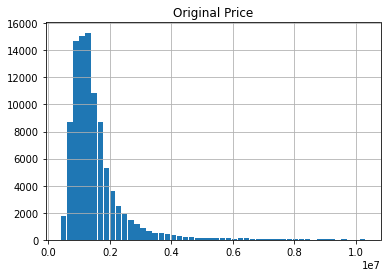

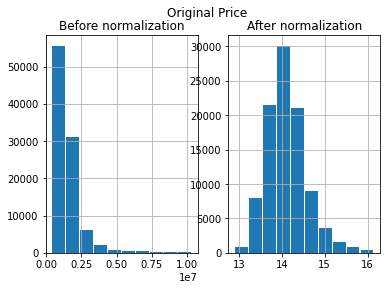

In [ ]:
# Model 3 - Reducing the super high priced housing
df['Original Price'] = df.apply(lambda x: math.exp(x['Price ($)']), axis=1)
df['Original Price'].describe()
df['Original Price'].quantile([0.025, 0.25, 0.5, 0.75, 0.997])
df_model3 = df.copy()
df_model3 = df_model3[df_model3['Original Price'] < df_model3['Original Price'].quantile([0.997]).iloc[0]]
df_model3[['Original Price']].hist(rwidth=0.9, bins = 50) # To check shape after removing huge variations
df.drop(['Original Price'], axis=1, inplace=True)
df_model3.drop(['Price ($)'], axis=1, inplace = True)


df1 = df_model3['Original Price']
df2 = np.log(df1)
plt.figure()
plt.suptitle("Original Price")
plt.subplot(1,2,1)
plt.title("Before normalization")
df1.hist(rwidth=0.9)
plt.subplot(1,2,2)
plt.title("After normalization")
df2.hist(rwidth=0.9)
df_model3['Original Price'] = np.log(df_model3['Original Price'])

In [ ]:

from sklearn.model_selection import train_test_split
X = df_model3.drop(['Original Price','remaining lease'], axis=1)
Y = df_model3[['Original Price']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))
model_scores_df.loc['model3'] = [round(scores.mean(),3),round(r2_test,3),round(adjusted_r2_test,3)]

Cross validated R^2 scores:  [0.7941163  0.7950649  0.7930091  0.80661035 0.79511384 0.79964532]
K fold Cross Validation Average Score: 0.797
r2 test:  0.803 
adjusted r2 test 0.802


**Model 4**

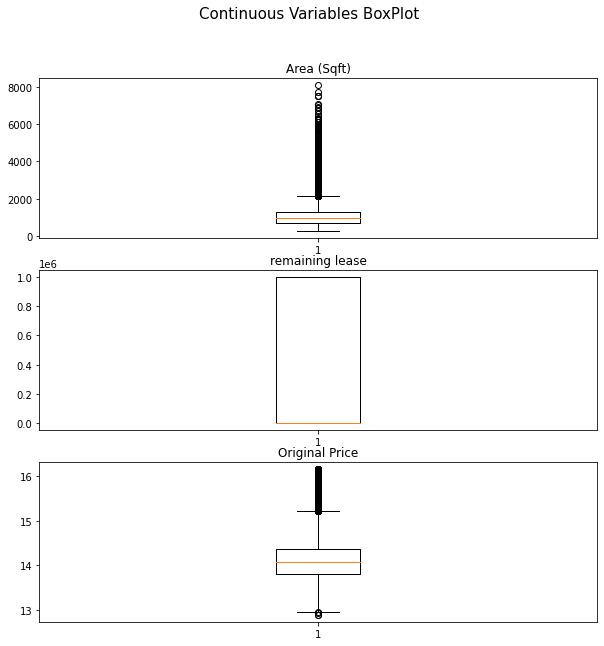

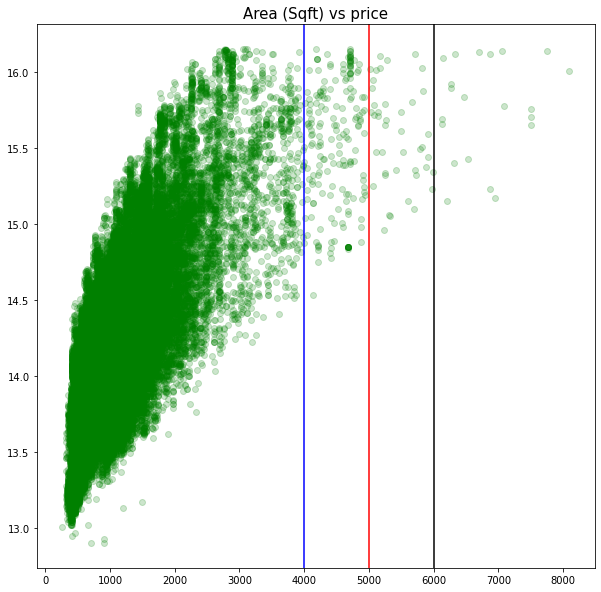

In [ ]:
# Model 4 - Reducing the super big area housing
df_model3['Area (Sqft)'].describe()
df_model3['Area (Sqft)'].quantile([0.025, 0.25, 0.995,0.996,0.997, 0.998,0.999])
plt.figure(figsize=(10,10))
plt.suptitle("Continuous Variables BoxPlot", fontsize=15)
model3_continuous_variables = ['Area (Sqft)', 'remaining lease','Original Price']
for i  in range(len(model3_continuous_variables)):
    plt.subplot(3,1,i+1)
    plt.title(model3_continuous_variables[i])
    plt.boxplot(df_model3[model3_continuous_variables[i]])

plt.figure(figsize=(10,10))
plt.title("Area (Sqft) vs price", fontsize=15)
plt.axvline(4000, 0, 1, label='4000',color='b')
plt.axvline(5000, 0, 1, label='5000',color='r')
plt.axvline(6000, 0, 1, label='6000',color='k')
plt.scatter(df_model3['Area (Sqft)'], df_model3['Original Price'], 
                c = 'g', alpha=0.2)

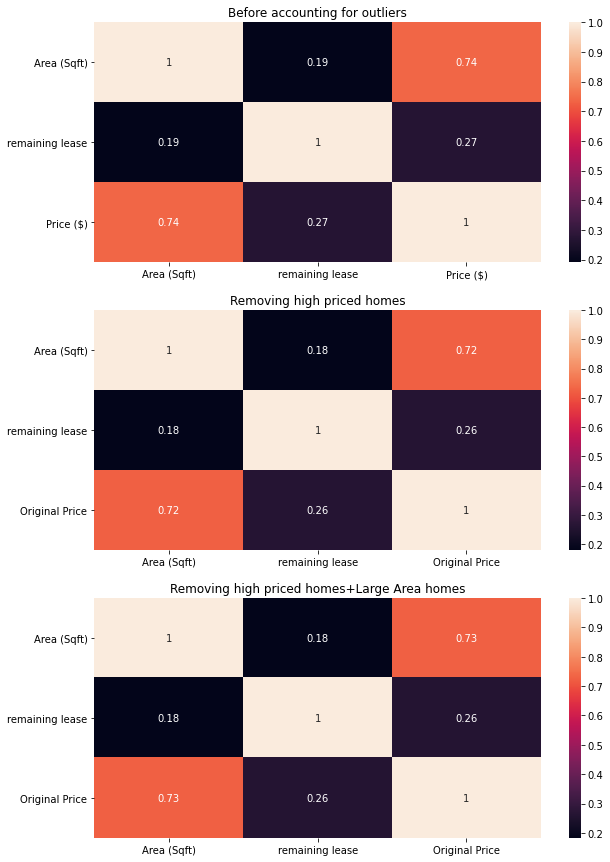

In [ ]:
# From graph looks like it make sense to perhaps omit datapoints with Area (Sqft) >5000
df_model4 = df_model3[df_model3['Area (Sqft)']<=5000]

df_corr = df[['Area (Sqft)', 'remaining lease','Price ($)']].corr()
model3_corr = df_model3[['Area (Sqft)', 'remaining lease','Original Price']].corr()
model4_corr = df_model4[['Area (Sqft)', 'remaining lease','Original Price']].corr()
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.title("Before accounting for outliers")
sns.heatmap(df_corr, annot=True)
plt.subplot(312)
plt.title("Removing high priced homes")
sns.heatmap(model3_corr, annot=True)
plt.subplot(313)
plt.title("Removing high priced homes+Large Area homes")
sns.heatmap(model4_corr, annot=True)

> Seems like accounting for outliers made our model slightly less correlated to the Pricing but lets train the model nevertheless. 

In [ ]:
from sklearn.model_selection import train_test_split
X = df_model4.drop(['Original Price','remaining lease'], axis=1)
Y = df_model4[['Original Price']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))
model_scores_df.loc['model4'] = [round(scores.mean(),3),round(r2_test,3),round(adjusted_r2_test,3)]


Cross validated R^2 scores:  [0.81211985 0.80731442 0.81681549 0.80615619 0.81515365 0.80336364]
K fold Cross Validation Average Score: 0.81
r2 test:  0.803 
adjusted r2 test 0.803


> Model suggests that by removing both the outliers of high pricing + large area housings,
we will get a model with a better goodness-of-fit. 

> Hence, we should use this model 

In [ ]:
# Model 5- Including the variable 'Unit Price ($psf) which we have removed earlier
df_model5 = df_model4.copy()
df_model5 = pd.merge(df_model5, df_original[['Unit Price ($psf)']], left_index = True, right_index=True)
model5_corr = df_model5[['Area (Sqft)', 'remaining lease','Original Price', 'Unit Price ($psf)']].corr()
# As seen, Unit Price ($psf) actually has a relatively strong correlation to our outcome variable Original Price 
# (aka Price ($) in original df). However, we omitted this factor as it was too specific in our business case
# Nobody will know what amount they want to pay per-square-foot ($psf) and is not a key metric buy homebuyers in the 
# general sense. 
# But lets see its impact on the model 
from sklearn.model_selection import train_test_split
X = df_model5.drop(['Original Price'], axis=1)
Y = df_model5[['Original Price']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))
model_scores_df.loc['model5'] = [round(scores.mean(),3),round(r2_test,3),round(adjusted_r2_test,3)]

Cross validated R^2 scores:  [0.900006   0.90044267 0.90462378 0.89669411 0.90103473 0.89514433]
K fold Cross Validation Average Score: 0.9
r2 test:  0.896 
adjusted r2 test 0.895


> An almost 0.1 improvement across all metrics!

> However, as per stated, due to our business case, this parameter won't be considered despite
its potential in improving the goodness-of-fit our model

In [ ]:
model_scores_df

,K-fold Average,r2_test,adjusted r2_test
model1,0.8,0.801,0.8
model2,0.8,0.801,0.8
model3,0.797,0.803,0.802
model4,0.81,0.803,0.803
model5,0.9,0.896,0.895


* Model 1 - Retaining ALL remaining variables and not excluding any outliers for each variable
* Model 2 - Removing variable 'remaining lease' 
* Model 3 - Reducing the super high priced housing (Outliers of outcome variable)
M* odel 4 - Reducing the super high priced housing + Reducing the super big area housing (Outliers)
* Model 5 - Including the variable 'Unit Price ($psf) which we have removed earlier


> Overall, we will choose model 4, which parameters suit our business case, and data are accounted for in the best possible way to ensure robustness of our model

So essentially, our final model will be in the form of:

Price ($) ~ [Dummy_Encode(Type, Postal District, Market Segment, Type of Sale, Floor Level, isFreehold) + Area (Sqft)]


<br><br>

#**Building Final model**

> We are building according to model 4

In [ ]:
df_final = df_model4.copy()
from sklearn.model_selection import train_test_split
X = df_final.drop(['Original Price','remaining lease'], axis=1)
Y = df_final[['Original Price']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train, y_train)


<br><br>

#**Model Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, X_train, y_train,cv=6)
print("Below are the metrics for our FINAL model that will be pushed out")
print("Cross validated R^2 scores: ", scores)
print("K fold Cross Validation Average Score:", round(scores.mean(),3))

y_predict = model.predict(X_test)
r2_test = model.score(X_test,y_test)
adjusted_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r2 test: ", round(r2_test,3),"\nadjusted r2 test", round(adjusted_r2_test,3))

from sklearn.metrics import mean_squared_error
y_test_lst = y_test['Original Price'].tolist()
y_predict_lst = list(map(lambda x: x[0], y_predict))
y_test_actual = []
y_predict_actual = []
for i in range(0,len(y_test)):
    y_test_actual.append(math.exp(y_test_lst[i]))
    y_predict_actual.append(math.exp(y_predict_lst[i]))
print("Minimum testing selling price: ", min(y_test_actual))
print("Maximum testing selling price: ", max(y_test_actual))
rmse = math.sqrt(mean_squared_error(y_test_actual, y_predict_actual))
normalized_rmse = rmse/(max(y_test_actual)-min(y_test_actual))
print(f'Normalized RMSE is {round(normalized_rmse,2)}')

Below are the metrics for our FINAL model that will be pushed out
Cross validated R^2 scores:  [0.81211985 0.80731442 0.81681549 0.80615619 0.81515365 0.80336364]
K fold Cross Validation Average Score: 0.81
r2 test:  0.803 
adjusted r2 test 0.803
Minimum testing selling price:  400000.0000000002
Maximum testing selling price:  10299999.999999985
Normalized RMSE is 0.08


#**Conclusion:**
* Our model on the test dataset has a value of 0.803, and an adjusted r2 of 0.803 as well, which indicates that our model has a high goodness-of-fit
* Our final model also has a normalized RMSE score of 0.08, indicating that our model has low error and high accuracy
* The model is able to give a good estimate of housing Price in the range based on the following parameters that will be inputted by user:

    Type - Apartment OR Condominium
    
    Postal District - Rough location                    
    
    Market Segment- In Town OR outside of Town
    
    Type of Sale - Resale OR New Development

    Floor Level - Which level category (in steps of 5 etc 1-5, 6-10, 11-15....)
    
    isFreehold - Freehold OR Not Freehold

    Area (Sqft) - Size of housing space (Giving a good gauge of # of rooms)


<br>

Overall, to confirm this model accuracy, we can test it with data that will be coming out in the following
few months (blinfold data testing).
            
<br>      
**Limitations of our project:**
<br>

*Data* - 
* No information on number of rooms, which in Singapore is an important metric when choosing a home,though Area (Sqft) does give a gauge on number of rooms

<br>

*Analysis & Model Building* - 
* We omitted the super high priced housing in our model to improve the fit of our regression model,hence our data cannot fully confirm if it can be extrapolated to account for the higher end pricing houses (etc above 11 million)
        
~ However, such houses transacted are of the low numbers and we want to cater to transactions that have higher volume 
    
* Model also excluded remaining lease indicator, which is a seemingly important factor by thought, but from our analysis show little improvement on our model